# Data preprocessing

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.api.types import union_categoricals

### Read dataset

In [183]:
data = pd.read_csv('processed_data.txt')

In [3]:
data.head(5)

,EventDate,Actor1CountryCode,Actor2CountryCode,GoldsteinScale_Summed,AvgTone_Summed,NumMentions_averaged,NumArticles_averaged
0,2015-01-31,AFG,PAK,8.5,2.205358,4.125000,4.125000
1,2015-01-31,AFG,USA,25.4,-25.458712,7.933333,7.933333
2,2015-01-31,AFR,BDI,-2.0,0.706714,5.000000,5.000000
3,2015-01-31,AFR,USA,2.8,5.889282,10.000000,10.000000
4,2015-01-31,AFR,ZAF,-30.0,-17.795758,4.000000,4.000000


### Alphabetical order transofrmation

In [169]:
# Remove tuples that contain the same two countries but in different order by averaging the values from both tuples (ex. AFG -PAK and PAK - AFG)

In [86]:
for i in range(data.shape[0]):
    if data.iloc[i, 2] < data.iloc[i, 1]:
        c1 = data.iloc[i, 2]
        data.iloc[i, 2] = data.iloc[i, 1]
        data.iloc[i, 1] = c1

In [105]:
data = data.groupby(['EventDate', 'Actor1CountryCode',	'Actor2CountryCode'])[['GoldsteinScale_Summed',	'AvgTone_Summed', 'NumMentions_averaged', 'NumArticles_averaged']].mean().reset_index()

In [106]:
data.head(5)

,EventDate,Actor1CountryCode,Actor2CountryCode,GoldsteinScale_Summed,AvgTone_Summed,NumMentions_averaged,NumArticles_averaged
0,2015-01-31,AFG,PAK,19.8,-7.682500,4.270833,4.270833
1,2015-01-31,AFG,USA,54.2,-37.340634,6.758333,6.758333
2,2015-01-31,AFR,BDI,-2.0,0.706714,5.000000,5.000000
3,2015-01-31,AFR,DJI,5.2,-1.477833,3.000000,3.000000
4,2015-01-31,AFR,NGA,1.0,-2.072539,6.000000,6.000000


### Familiarization

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239911 entries, 0 to 239910
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EventDate              239911 non-null  object 
 1   Actor1CountryCode      239911 non-null  object 
 2   Actor2CountryCode      239911 non-null  object 
 3   GoldsteinScale_Summed  239911 non-null  float64
 4   AvgTone_Summed         239911 non-null  float64
 5   NumMentions_averaged   239911 non-null  float64
 6   NumArticles_averaged   239911 non-null  float64
dtypes: float64(4), object(3)
memory usage: 12.8+ MB


In [108]:
data.describe()

,GoldsteinScale_Summed,AvgTone_Summed,NumMentions_averaged,NumArticles_averaged
count,239911.000000,239911.000000,239911.000000,239911.000000
mean,9.275700,-18.276952,5.150839,5.048537
std,97.098742,178.496344,3.026468,2.871697
min,-25274.300000,-43551.428705,1.000000,1.000000
25%,0.000000,-11.111111,3.125000,3.050000
50%,3.500000,-2.623038,5.000000,4.872727
75%,10.600000,2.719033,6.000000,6.000000
max,3808.500000,396.169518,275.000000,275.000000


In [109]:
data.shape

(239911, 7)

# Graph building

In [156]:
# extract nodes from data - the unique country codes
a1 = pd.Categorical(data['Actor1CountryCode'])
a2 = pd.Categorical(data['Actor2CountryCode'])
nodes = union_categoricals([a1, a2]).categories.to_list()
nodes

['ABW',
 'AFG',
 'AFR',
 'AGO',
 'AIA',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASA',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CAS',
 'CAU',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRB',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAF',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUR',
 'FIN',
 'FJI',
 'FRA',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAM',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDA',
 'MDG',
 'MDV',


In [181]:
g = nx.MultiGraph()

In [158]:
g.nodes

NodeView(())

In [159]:
g.edges

MultiEdgeView([])

In [162]:
for i in range(data.shape[0]):
    if data.iloc[i,0] == '2015-01-31':
        g.add_edge(data.iloc[i,1], data.iloc[i,2], data.iloc[i,3])
        g.add_edge(data.iloc[i,1], data.iloc[i,2], data.iloc[i,4])
        g.add_edge(data.iloc[i,1], data.iloc[i,2], data.iloc[i,5])
        g.add_edge(data.iloc[i,1], data.iloc[i,2], data.iloc[i,6])
    else:
        break 

In [163]:
g.edges

MultiEdgeView([('AFG', 'PAK', 19.8), ('AFG', 'PAK', -7.682499744517521), ('AFG', 'PAK', 4.270833333333334), ('AFG', 'USA', 54.2), ('AFG', 'USA', -37.340633931578964), ('AFG', 'USA', 6.758333333333333), ('PAK', 'CHN', 4.0), ('PAK', 'CHN', 0.3003003003003), ('PAK', 'CHN', 6.0), ('PAK', 'MEX', -4.4), ('PAK', 'MEX', 1.88679245283019), ('PAK', 'MEX', 10.0), ('PAK', 'SAU', -10.0), ('PAK', 'SAU', -3.89610389610389), ('PAK', 'SAU', 3.0), ('PAK', 'USA', 1.0), ('PAK', 'USA', -3.79213483146067), ('PAK', 'USA', 10.0), ('USA', 'AFR', 2.3499999999999996), ('USA', 'AFR', 5.88928150765607), ('USA', 'AFR', 10.0), ('USA', 'AUS', 2.0), ('USA', 'AUS', 8.03976308223153), ('USA', 'AUS', 5.5), ('USA', 'BGD', 0.0), ('USA', 'BGD', -6.55737704918032), ('USA', 'BGD', 6.0), ('USA', 'BLR', -20.0), ('USA', 'BLR', -26.803250140928), ('USA', 'BLR', 1.0), ('USA', 'BLZ', 0.0), ('USA', 'BLZ', -7.10059171597632), ('USA', 'BLZ', 2.5), ('USA', 'CAN', 8.0), ('USA', 'CAN', 1.41798671435871), ('USA', 'CAN', 5.5), ('USA', 'CHE

In [164]:
for (u,v,d) in g.edges:
    print((u,v,d))

('AFG', 'PAK', 19.8)
('AFG', 'PAK', -7.682499744517521)
('AFG', 'PAK', 4.270833333333334)
('AFG', 'USA', 54.2)
('AFG', 'USA', -37.340633931578964)
('AFG', 'USA', 6.758333333333333)
('PAK', 'CHN', 4.0)
('PAK', 'CHN', 0.3003003003003)
('PAK', 'CHN', 6.0)
('PAK', 'MEX', -4.4)
('PAK', 'MEX', 1.88679245283019)
('PAK', 'MEX', 10.0)
('PAK', 'SAU', -10.0)
('PAK', 'SAU', -3.89610389610389)
('PAK', 'SAU', 3.0)
('PAK', 'USA', 1.0)
('PAK', 'USA', -3.79213483146067)
('PAK', 'USA', 10.0)
('USA', 'AFR', 2.3499999999999996)
('USA', 'AFR', 5.88928150765607)
('USA', 'AFR', 10.0)
('USA', 'AUS', 2.0)
('USA', 'AUS', 8.03976308223153)
('USA', 'AUS', 5.5)
('USA', 'BGD', 0.0)
('USA', 'BGD', -6.55737704918032)
('USA', 'BGD', 6.0)
('USA', 'BLR', -20.0)
('USA', 'BLR', -26.803250140928)
('USA', 'BLR', 1.0)
('USA', 'BLZ', 0.0)
('USA', 'BLZ', -7.10059171597632)
('USA', 'BLZ', 2.5)
('USA', 'CAN', 8.0)
('USA', 'CAN', 1.41798671435871)
('USA', 'CAN', 5.5)
('USA', 'CHE', 14.8)
('USA', 'CHE', 1.80451127819548)
('USA', '

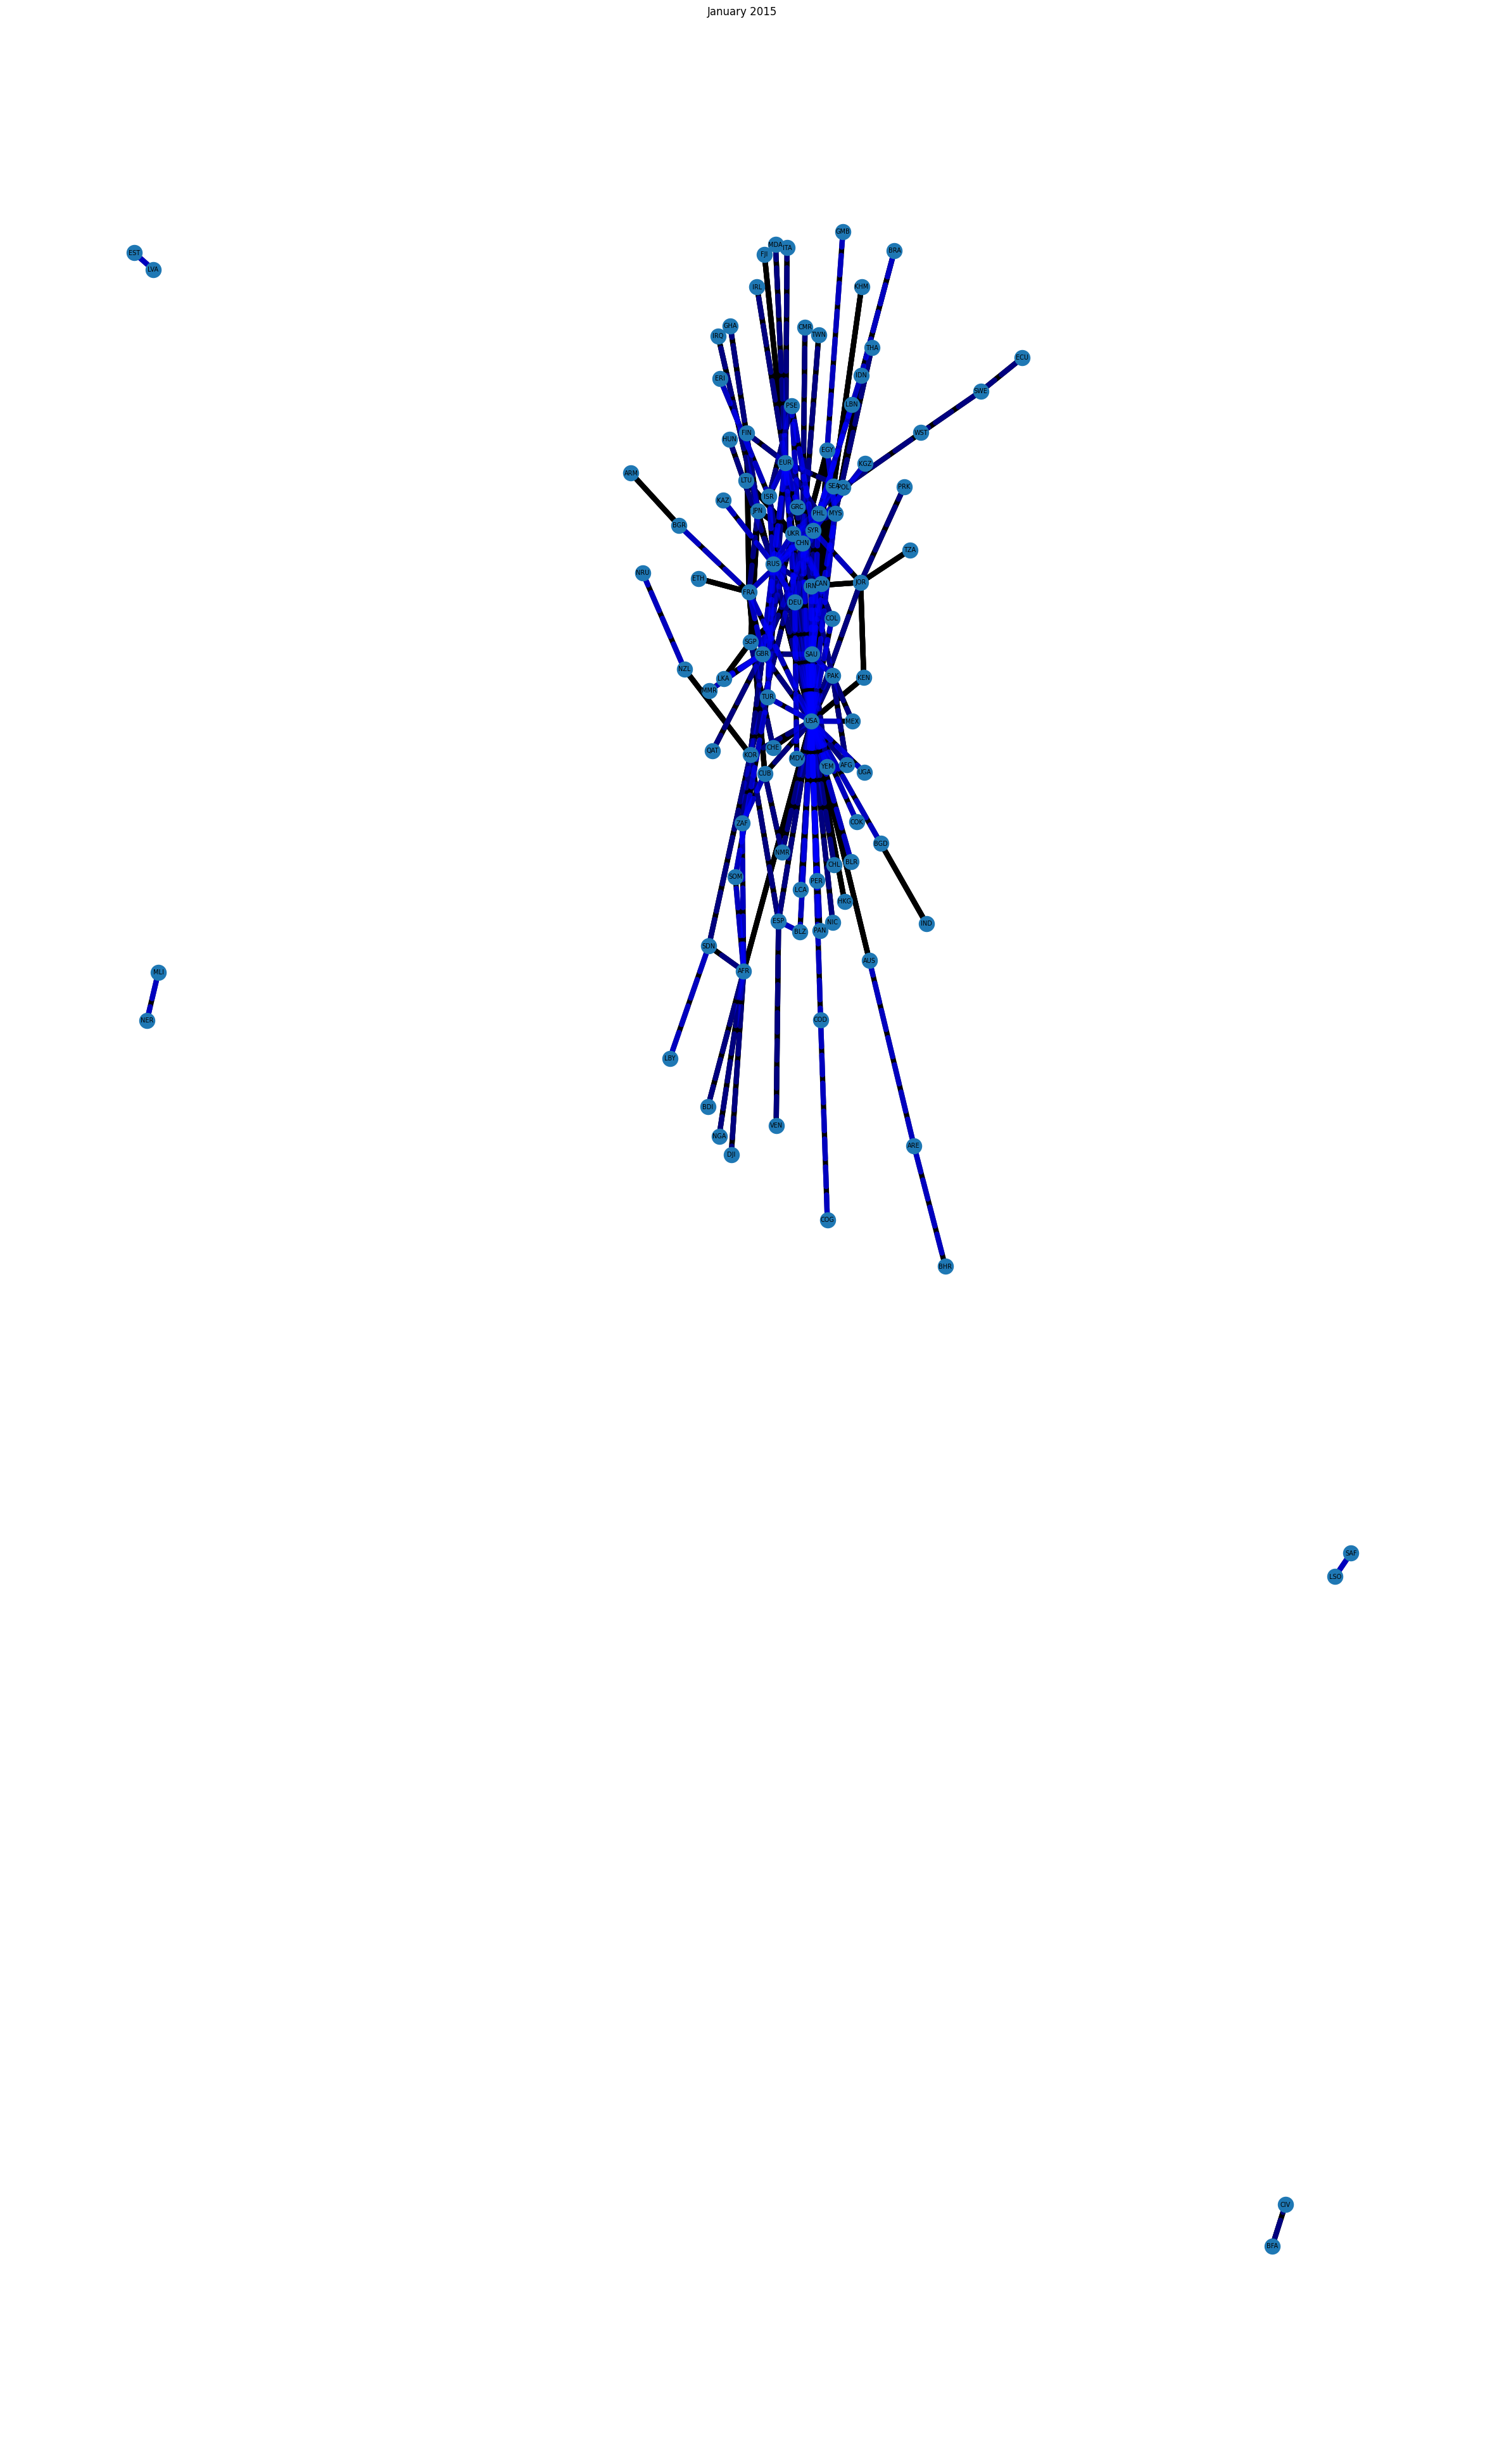

In [166]:
elarge=[(u,v) for (u,v,d) in g.edges if d >0.5]
esmall=[(u,v) for (u,v,d) in g.edges if d <=0.5]

plt.figure(figsize=(30, 50))
pos=nx.spring_layout(g) # positions for all nodes

# nodes
nx.draw_networkx_nodes(g,pos,node_size=300)

# edges
nx.draw_networkx_edges(g,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(g,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(g,pos,font_size=7,font_family='sans-serif')

plt.axis('off')
plt.title('January 2015')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

### Building graph with attributes on edges

In [170]:
g = nx.MultiGraph()

In [176]:
for i in range(data.shape[0]):
    if data.iloc[i,0] == '2015-01-31':
        g.add_edge(data.iloc[i,1], data.iloc[i,2], glt_sc = data.iloc[i,3], avg_tone = data.iloc[i,4], num_mentions= data.iloc[i,5], num_articles= data.iloc[i,6])
    else:
        break 

In [179]:
g.edges()

MultiEdgeDataView([('AFG', 'PAK'), ('AFG', 'USA'), ('PAK', 'CHN'), ('PAK', 'MEX'), ('PAK', 'SAU'), ('PAK', 'USA'), ('USA', 'AFR'), ('USA', 'AUS'), ('USA', 'BGD'), ('USA', 'BLR'), ('USA', 'BLZ'), ('USA', 'CAN'), ('USA', 'CHE'), ('USA', 'CHL'), ('USA', 'CHN'), ('USA', 'COD'), ('USA', 'COK'), ('USA', 'COL'), ('USA', 'CUB'), ('USA', 'DEU'), ('USA', 'EGY'), ('USA', 'ESP'), ('USA', 'EUR'), ('USA', 'FRA'), ('USA', 'GBR'), ('USA', 'GRC'), ('USA', 'HKG'), ('USA', 'IRN'), ('USA', 'ISR'), ('USA', 'JOR'), ('USA', 'JPN'), ('USA', 'KEN'), ('USA', 'KOR'), ('USA', 'LCA'), ('USA', 'MEX'), ('USA', 'MYS'), ('USA', 'NIC'), ('USA', 'NMR'), ('USA', 'PAN'), ('USA', 'PER'), ('USA', 'PHL'), ('USA', 'RUS'), ('USA', 'SAU'), ('USA', 'SEA'), ('USA', 'SYR'), ('USA', 'TUR'), ('USA', 'UGA'), ('USA', 'YEM'), ('AFR', 'BDI'), ('AFR', 'DJI'), ('AFR', 'NGA'), ('AFR', 'SDN'), ('AFR', 'SOM'), ('AFR', 'ZAF'), ('SDN', 'KOR'), ('SDN', 'LBY'), ('SOM', 'TUR'), ('ZAF', 'CUB'), ('ZAF', 'GBR'), ('ARE', 'AUS'), ('ARE', 'BHR'), ('ARM

In [180]:
for (u,v,d) in g.edges(data=True):
    print((u,v,d))

('AFG', 'PAK', {'glt_sc': 19.8, 'avg_tone': -7.682499744517521, 'num_mentions': 4.270833333333334, 'num_articles': 4.270833333333334})
('AFG', 'USA', {'glt_sc': 54.2, 'avg_tone': -37.340633931578964, 'num_mentions': 6.758333333333333, 'num_articles': 6.758333333333333})
('PAK', 'CHN', {'glt_sc': 4.0, 'avg_tone': 0.3003003003003, 'num_mentions': 6.0, 'num_articles': 6.0})
('PAK', 'MEX', {'glt_sc': -4.4, 'avg_tone': 1.88679245283019, 'num_mentions': 10.0, 'num_articles': 10.0})
('PAK', 'SAU', {'glt_sc': -10.0, 'avg_tone': -3.89610389610389, 'num_mentions': 3.0, 'num_articles': 3.0})
('PAK', 'USA', {'glt_sc': 1.0, 'avg_tone': -3.79213483146067, 'num_mentions': 10.0, 'num_articles': 10.0})
('USA', 'AFR', {'glt_sc': 2.3499999999999996, 'avg_tone': 5.88928150765607, 'num_mentions': 10.0, 'num_articles': 10.0})
('USA', 'AUS', {'glt_sc': 2.0, 'avg_tone': 8.03976308223153, 'num_mentions': 5.5, 'num_articles': 5.5})
('USA', 'BGD', {'glt_sc': 0.0, 'avg_tone': -6.55737704918032, 'num_mentions': 6.